In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('reddit_data.csv')

In [6]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [7]:
df.tail()

,clean_comment,category
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1
37248,facebook itself now working bjp’ cell,0


In [8]:
df.shape

(37249, 2)

In [9]:
df.columns

Index(['clean_comment', 'category'], dtype='object')

In [10]:
df.duplicated().sum()

449

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

clean_comment    1
category         0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36799 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36799 non-null  object
 1   category       36799 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.5+ KB


In [16]:
df.describe()

,category
count,36799.000000
mean,0.204381
std,0.781670
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [17]:
df['category'].unique()

array([ 1, -1,  0], dtype=int64)

In [18]:
df['category'].value_counts()

category
 1    15771
 0    12778
-1     8250
Name: count, dtype: int64

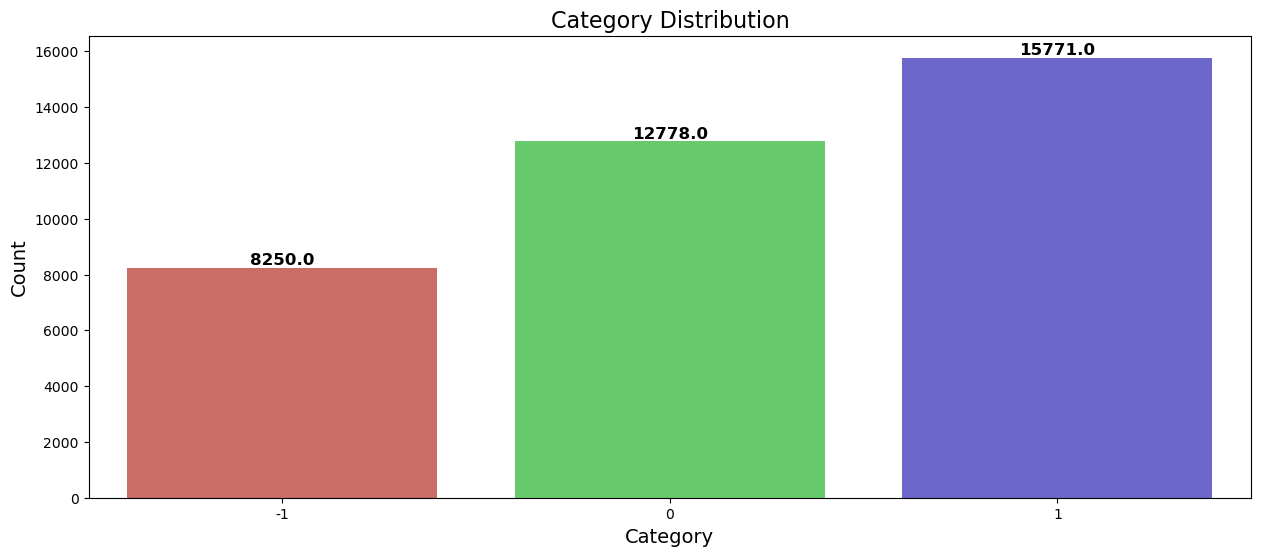

In [19]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='category', data=df, palette='hls')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Category Distribution', fontsize=16)
plt.show()

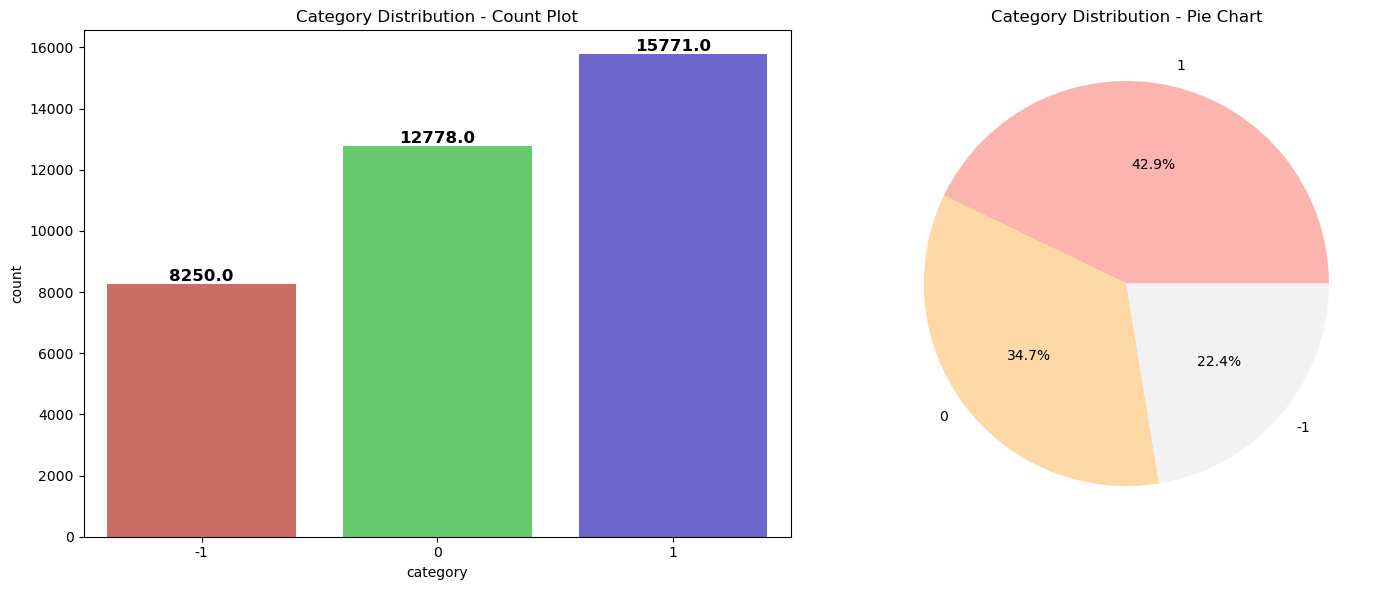

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax1 = sns.countplot(x='category', data=df, palette='hls', ax=axes[0])
axes[0].set_title('Category Distribution - Count Plot')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

df['category'].value_counts().plot.pie(autopct='%1.1f%%', cmap='Pastel1', ax=axes[1])
axes[1].set_ylabel('') 
axes[1].set_title('Category Distribution - Pie Chart')

plt.tight_layout()
plt.show()

In [21]:
df_new = df.copy()

In [22]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [23]:
df_new['clean_comment'] = df_new['clean_comment'].apply(lambda x: clean_text(x))

In [24]:
df_new['clean_comment']

0        family mormon have never tried explain them th...
1        buddhism has very much lot compatible with chr...
2        seriously don say thing first all they won get...
3        what you have learned yours and only yours wha...
4        for your own benefit you may want read living ...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                facebook itself now working bjp’ cell
Name: clean_comment, Length: 36799, dtype: object

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [27]:
df_new['clean_comment']= df_new['clean_comment'].apply(lambda x:remove_punctuation(x))

In [28]:
df_new['clean_comment']

0        family mormon have never tried explain them th...
1        buddhism has very much lot compatible with chr...
2        seriously don say thing first all they won get...
3        what you have learned yours and only yours wha...
4        for your own benefit you may want read living ...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                facebook itself now working bjp’ cell
Name: clean_comment, Length: 36799, dtype: object

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [31]:
df_new['clean_comment']= df_new['clean_comment'].apply(lambda x:remove_punctuation(x))

In [32]:
df_new['clean_comment']

0        family mormon have never tried explain them th...
1        buddhism has very much lot compatible with chr...
2        seriously don say thing first all they won get...
3        what you have learned yours and only yours wha...
4        for your own benefit you may want read living ...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                facebook itself now working bjp’ cell
Name: clean_comment, Length: 36799, dtype: object

In [33]:
import re

In [34]:
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens

In [35]:
df_new['clean_comment']= df_new['clean_comment'].apply(lambda x: tokenization(x))

In [36]:
df_new['clean_comment']

0        [family, mormon, have, never, tried, explain, ...
1        [buddhism, has, very, much, lot, compatible, w...
2        [seriously, don, say, thing, first, all, they,...
3        [what, you, have, learned, yours, and, only, y...
4        [for, your, own, benefit, you, may, want, read...
                               ...                        
37244                                              [jesus]
37245    [kya, bhai, pure, saal, chutiya, banaya, modi,...
37246          [downvote, karna, tha, par, upvote, hogaya]
37247                                         [haha, nice]
37248          [facebook, itself, now, working, bjp, cell]
Name: clean_comment, Length: 36799, dtype: object

In [37]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import nltk
from wordcloud import WordCloud

In [39]:
stopwords = nltk.corpus.stopwords.words('english')

In [40]:
def remove_stopwords(text):
    output= " ".join([i for i in text if i not in stopwords])
    return output

In [41]:
df_new['clean_comment']= df_new['clean_comment'].apply(lambda x:remove_stopwords(x))

In [42]:
df_new['clean_comment']

0        family mormon never tried explain still stare ...
1        buddhism much lot compatible christianity espe...
2        seriously say thing first get complex explain ...
3        learned want teach different focus goal wrappi...
4        benefit may want read living buddha living chr...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                            facebook working bjp cell
Name: clean_comment, Length: 36799, dtype: object

In [43]:
def remove_stopwords(text):
    output = " ".join(i for i in text.split() if i not in stopwords)
    return output

df_new['clean_comment'] = df_new['clean_comment'].apply(lambda x: remove_stopwords(x))

In [44]:
df_new['clean_comment']

0        family mormon never tried explain still stare ...
1        buddhism much lot compatible christianity espe...
2        seriously say thing first get complex explain ...
3        learned want teach different focus goal wrappi...
4        benefit may want read living buddha living chr...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                            facebook working bjp cell
Name: clean_comment, Length: 36799, dtype: object

In [45]:
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

In [46]:
df_new['clean_comment']= df_new['clean_comment'].apply(lambda x: tokenization(x))

In [47]:
df_new['clean_comment']

0        [family, mormon, never, tried, explain, still,...
1        [buddhism, much, lot, compatible, christianity...
2        [seriously, say, thing, first, get, complex, e...
3        [learned, want, teach, different, focus, goal,...
4        [benefit, may, want, read, living, buddha, liv...
                               ...                        
37244                                              [jesus]
37245    [kya, bhai, pure, saal, chutiya, banaya, modi,...
37246          [downvote, karna, tha, par, upvote, hogaya]
37247                                         [haha, nice]
37248                       [facebook, working, bjp, cell]
Name: clean_comment, Length: 36799, dtype: object

In [48]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, for better lemmatization


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [49]:
from nltk.stem import WordNetLemmatizer

In [50]:
wordnet_lemmatizer = WordNetLemmatizer()

In [51]:
def lemmatizer(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [52]:
df_new['clean_comment']=df_new['clean_comment'].apply(lambda x:lemmatizer(x))

In [53]:
df_new['clean_comment']

0        family mormon never tried explain still stare ...
1        buddhism much lot compatible christianity espe...
2        seriously say thing first get complex explain ...
3        learned want teach different focus goal wrappi...
4        benefit may want read living buddha living chr...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                            facebook working bjp cell
Name: clean_comment, Length: 36799, dtype: object

In [54]:
df_new['clean_comment']= df_new['clean_comment'].apply(lambda x: tokenization(x))

In [55]:
def lemmatizer_new(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word, pos = 'v') for word in text])
    return lemm_text

In [56]:
df_new['clean_comment']=df_new['clean_comment'].apply(lambda x:lemmatizer_new(x))

In [57]:
df_new['clean_comment']

0        family mormon never try explain still stare pu...
1        buddhism much lot compatible christianity espe...
2        seriously say thing first get complex explain ...
3        learn want teach different focus goal wrap pap...
4        benefit may want read live buddha live christ ...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                               facebook work bjp cell
Name: clean_comment, Length: 36799, dtype: object

In [58]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()
    text = re.sub('\S*\d\S*\s*','', text).strip()
    return text.strip()

In [59]:
df_new['clean_comment'] = df_new['clean_comment'].apply(lambda x: clean_text(x))

In [60]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [61]:
df_new['clean_comment'] = df_new['clean_comment'].apply(lambda x: remove_urls(x))

In [62]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [63]:
df_new['clean_comment'] = df_new['clean_comment'].apply(lambda x: remove_digits(x))

In [64]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [65]:
df_new['clean_comment'] = df_new['clean_comment'].apply(lambda x: remove_emojis(x))

In [66]:
df_new['clean_comment'] = df_new['clean_comment'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [67]:
df_new['clean_comment'] = df_new['clean_comment'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [68]:
df_new

,clean_comment,category
0,family mormon never try explain still stare pu...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learn want teach different focus goal wrap pap...,0
4,benefit may want read live buddha live christ ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


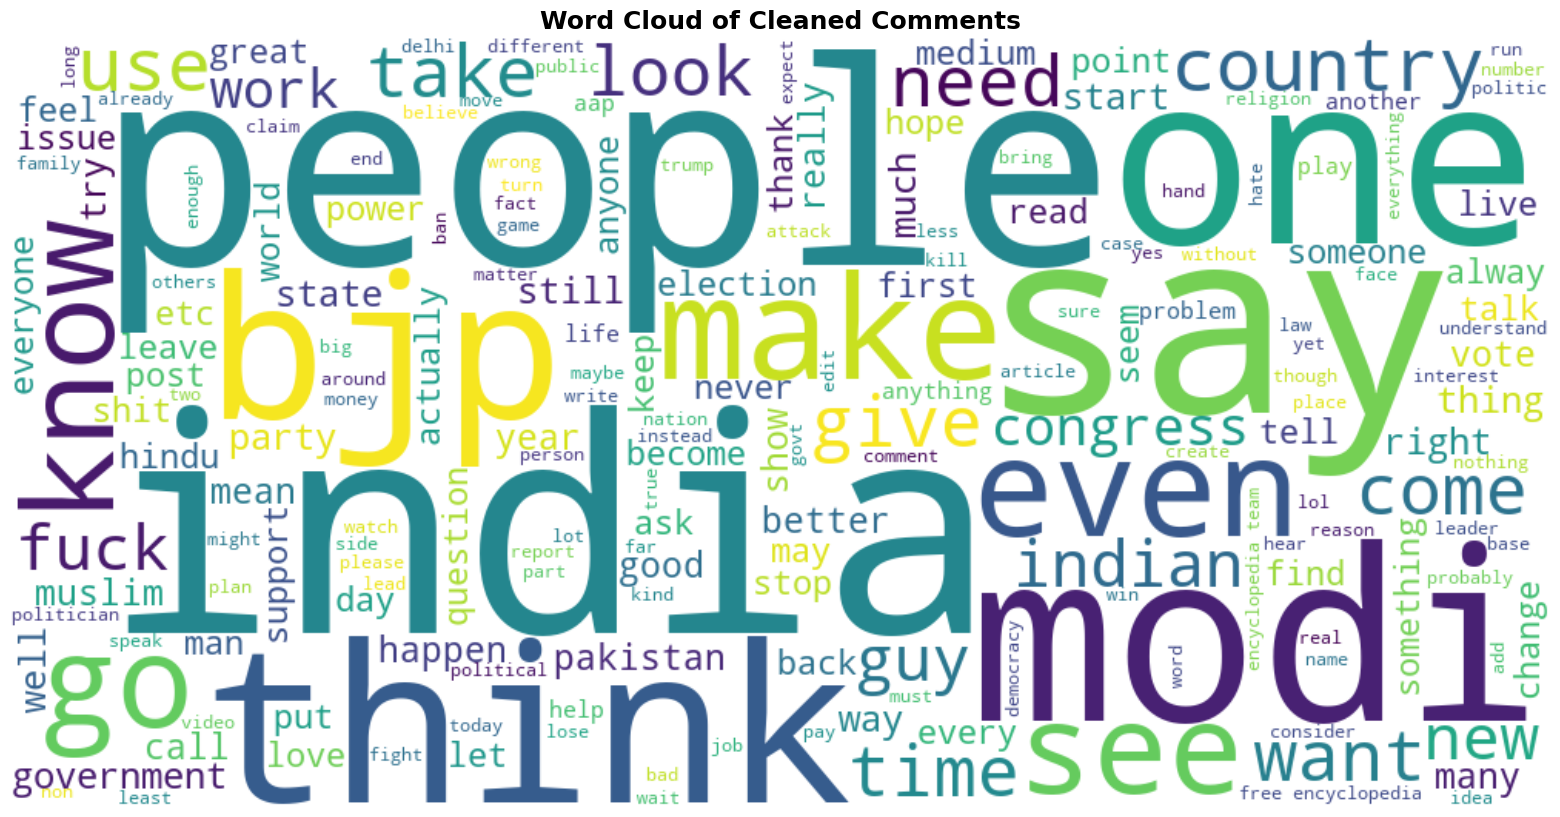

In [69]:
text_data = ' '.join(df_new['clean_comment'])
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis',
    max_words=200,
    contour_color='steelblue',
    contour_width=1.5
).generate(text_data)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title("Word Cloud of Cleaned Comments", fontsize=18, fontweight='bold')

plt.show()


In [70]:
X=df_new['clean_comment']
y=df_new['category']

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tfidf_vectorizer = TfidfVectorizer(max_features=50000)
X_tfidf=tfidf_vectorizer.fit_transform(X)

In [73]:
X_tfidf

<36799x41332 sparse matrix of type '<class 'numpy.float64'>'
	with 596200 stored elements in Compressed Sparse Row format>

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [77]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [80]:
y_pred = log_reg.predict(X_test)

In [81]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8118206521739131

Classification Report:
               precision    recall  f1-score   support

          -1       0.72      0.71      0.72      1650
           0       0.80      0.91      0.85      2556
           1       0.88      0.79      0.83      3154

    accuracy                           0.81      7360
   macro avg       0.80      0.80      0.80      7360
weighted avg       0.82      0.81      0.81      7360



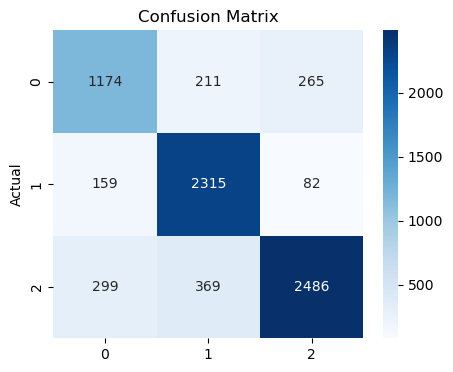

In [82]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [85]:
y_pred = dt_classifier.predict(X_test)

In [86]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7657608695652174

Classification Report:
               precision    recall  f1-score   support

          -1       0.62      0.63      0.62      1650
           0       0.82      0.88      0.85      2556
           1       0.80      0.75      0.77      3154

    accuracy                           0.77      7360
   macro avg       0.75      0.75      0.75      7360
weighted avg       0.77      0.77      0.77      7360



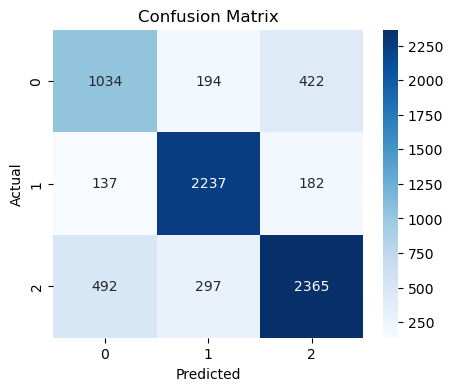

In [87]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [88]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
naive_bayes_classifier=MultinomialNB()
naive_bayes_classifier.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [90]:
y_pred = naive_bayes_classifier.predict(X_test)

In [91]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.647554347826087

Classification Report:
               precision    recall  f1-score   support

          -1       0.54      0.61      0.57      1650
           0       0.86      0.39      0.54      2556
           1       0.64      0.87      0.74      3154

    accuracy                           0.65      7360
   macro avg       0.68      0.63      0.62      7360
weighted avg       0.69      0.65      0.63      7360



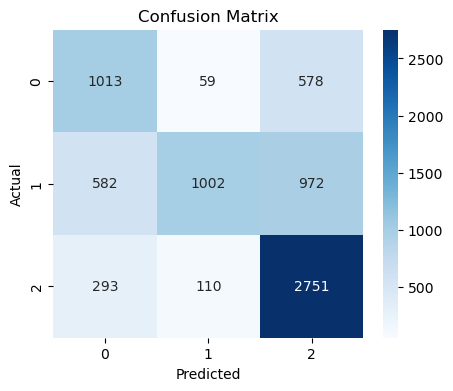

In [92]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [95]:
y_pred = rf_model.predict(X_test)

In [96]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7994565217391304

Classification Report:
               precision    recall  f1-score   support

          -1       0.76      0.59      0.66      1650
           0       0.79      0.94      0.86      2556
           1       0.83      0.80      0.81      3154

    accuracy                           0.80      7360
   macro avg       0.79      0.77      0.78      7360
weighted avg       0.80      0.80      0.79      7360



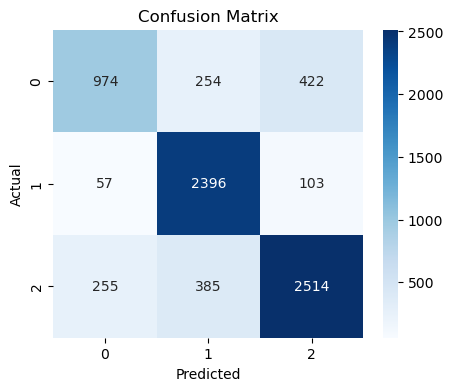

In [97]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [98]:
from sklearn.svm import SVC

In [99]:
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [100]:
y_pred = svm_model.predict(X_test)

In [101]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8258152173913044

Classification Report:
               precision    recall  f1-score   support

          -1       0.71      0.72      0.72      1650
           0       0.83      0.93      0.88      2556
           1       0.88      0.80      0.84      3154

    accuracy                           0.83      7360
   macro avg       0.81      0.82      0.81      7360
weighted avg       0.83      0.83      0.83      7360



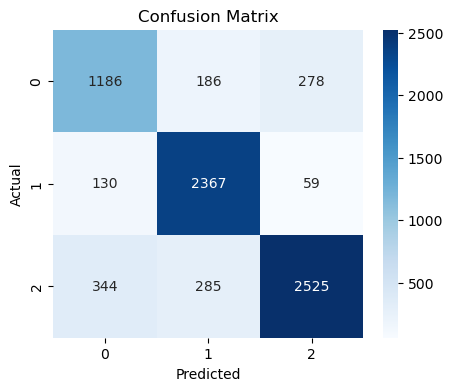

In [102]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()